**Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

**Loading Dataset**

In [ ]:
file =  pd.read_csv('Social_Network_Ads.csv')
file

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
file.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
file.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
file.shape

(400, 5)

In [ ]:
file.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Checking Null values**

In [ ]:
file.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Label encoding:- Converting categorical data into numerical data

In [ ]:
gender_mapping = {'Male': 1, 'Female': 0}
file['Male'] = file['Gender'].map(gender_mapping)
file

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


Dropping unnecessary columns

In [ ]:
file = file.drop(['User ID', 'Gender'], axis=1)
file

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [ ]:
column_order = ['Age','Male','EstimatedSalary','Purchased']
file = file[column_order]
file

,Age,Male,EstimatedSalary,Purchased
0,19,1,19000,0
1,35,1,20000,0
2,26,0,43000,0
3,27,0,57000,0
4,19,1,76000,0
...,...,...,...,...
395,46,0,41000,1
396,51,1,23000,1
397,50,0,20000,1
398,36,1,33000,0


#**Training Linear Regression Model for classification**



**Dividing the dataset into independent(features) and dependent(target) variables**

In [ ]:
X = file[['Age','Male','EstimatedSalary']]
X

,Age,Male,EstimatedSalary
0,19,1,19000
1,35,1,20000
2,26,0,43000
3,27,0,57000
4,19,1,76000
...,...,...,...
395,46,0,41000
396,51,1,23000
397,50,0,20000
398,36,1,33000


In [ ]:
y = file[['Purchased']]
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


**Split the data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Standardisation**

In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train, np.ravel(y_train))
y_pred = lr.predict(X_test)

Printing the predicted and actual output

In [ ]:
columns = ['Age', 'Male', 'EstimatedSalary', 'Purchased(predicted)']
X_test_df = pd.DataFrame(X_test, columns=columns[:-1])

table_data = np.column_stack((X_test_df[:10].values, y_pred[:10]))
headers = columns
table = tabulate(table_data, headers, tablefmt="fancy_grid")
print(table)

╒═══════════╤═══════════╤═══════════════════╤════════════════════════╕
│       Age │      Male │   EstimatedSalary │   Purchased(predicted) │
╞═══════════╪═══════════╪═══════════════════╪════════════════════════╡
│  0.812419 │ -0.986754 │         -1.39921  │                      0 │
├───────────┼───────────┼───────────────────┼────────────────────────┤
│  2.08898  │ -0.986754 │          0.528719 │                      1 │
├───────────┼───────────┼───────────────────┼────────────────────────┤
│ -0.955132 │ -0.986754 │         -0.756565 │                      0 │
├───────────┼───────────┼───────────────────┼────────────────────────┤
│  1.00881  │ -0.986754 │          0.762408 │                      1 │
├───────────┼───────────┼───────────────────┼────────────────────────┤
│ -0.856935 │ -0.986754 │         -1.22394  │                      0 │
├───────────┼───────────┼───────────────────┼────────────────────────┤
│ -0.758738 │ -0.986754 │         -0.230767 │                      0 │
├─────

In [ ]:
results_df = pd.DataFrame(np.column_stack((y_test, y_pred)), columns=['Actual Purchased', 'Predicted Purchased'])
table = tabulate(results_df.head(10), headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)

╒════════════════════╤═══════════════════════╕
│   Actual Purchased │   Predicted Purchased │
╞════════════════════╪═══════════════════════╡
│                  0 │                     0 │
├────────────────────┼───────────────────────┤
│                  1 │                     1 │
├────────────────────┼───────────────────────┤
│                  0 │                     0 │
├────────────────────┼───────────────────────┤
│                  1 │                     1 │
├────────────────────┼───────────────────────┤
│                  0 │                     0 │
├────────────────────┼───────────────────────┤
│                  0 │                     0 │
├────────────────────┼───────────────────────┤
│                  1 │                     1 │
├────────────────────┼───────────────────────┤
│                  0 │                     0 │
├────────────────────┼───────────────────────┤
│                  0 │                     0 │
├────────────────────┼───────────────────────┤
│            

Getting confusion matrix for the results

In [ ]:
matrix = confusion_matrix(y_test,y_pred,labels = lr.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test,y_pred,labels=[1,0]).reshape(-1)

[[61  2]
 [10 27]]


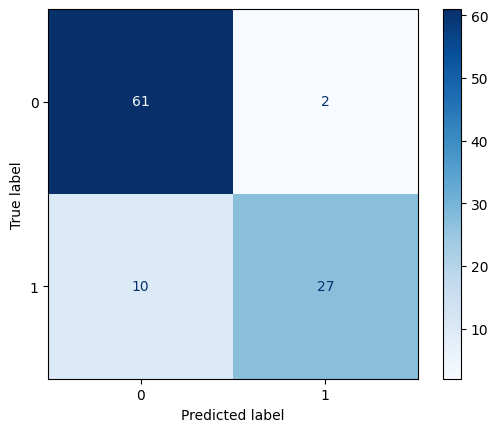

In [ ]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=lr.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        63
           1       0.93      0.73      0.82        37

    accuracy                           0.88       100
   macro avg       0.90      0.85      0.86       100
weighted avg       0.89      0.88      0.88       100



Evaluating the model

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Recall or True positive rate :',tp/(tp+fn))
print('True negative rate :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))

Accuracy: 0.88
Error Rate:  0.12
Recall or True positive rate : 0.7297297297297297
True negative rate : 0.9682539682539683
Precision (Positive predictive value) : 0.9310344827586207
False Positive Rate : 0.031746031746031744
